In [1]:
import pandas as pd

In [2]:
crimes = pd.read_csv('../data/crimes.csv', low_memory=False)


In [3]:
crimes.shape

(7643707, 22)

In [4]:
crimes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7643707 entries, 0 to 7643706
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
# read slim 2022 crimes csv data
crimes_df = pd.read_csv('../data/crimes-2022-slim.csv.zip',
  parse_dates=['Date'],
  cache_dates=True,
  low_memory=False)


In [6]:
crimes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201432 entries, 0 to 201431
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  201432 non-null  datetime64[ns]
 1   Block                 201432 non-null  object        
 2   Primary Type          201432 non-null  object        
 3   Description           201432 non-null  object        
 4   Location Description  200857 non-null  object        
 5   Arrest                201432 non-null  bool          
 6   Domestic              201432 non-null  bool          
 7   Beat                  201432 non-null  int64         
 8   District              201432 non-null  int64         
 9   Ward                  201422 non-null  float64       
 10  Community Area        201432 non-null  int64         
 11  Latitude              200034 non-null  float64       
 12  Longitude             200034 non-null  float64       
dtyp

In [7]:
# get crime types
crime_types = crimes[['Primary Type']]

# get crime counts by primary type
crime_type_total = crime_types.groupby('Primary Type').size()

# get arrests and domestic counts for each primary crime type
crime_type_counts = crimes[['Primary Type', 'Arrest', 'Domestic']]\
    .groupby('Primary Type').sum()

# add crime type totals column
crime_type_counts['Total'] = crime_type_total

# print all crime stats (arrests, domestic, and totals)
crime_type_counts.sort_values(by='Total', ascending=False).style

,Arrest,Domestic,Total
Primary Type,,,
THEFT,182305,43183,1612023
BATTERY,309617,611740,1401115
CRIMINAL DAMAGE,59079,73851,871255
NARCOTICS,739675,303,744105
ASSAULT,106672,113023,495960
OTHER OFFENSE,83782,142432,475452
BURGLARY,24009,3584,420155
MOTOR VEHICLE THEFT,30470,2130,357647
DECEPTIVE PRACTICE,46021,3815,334363


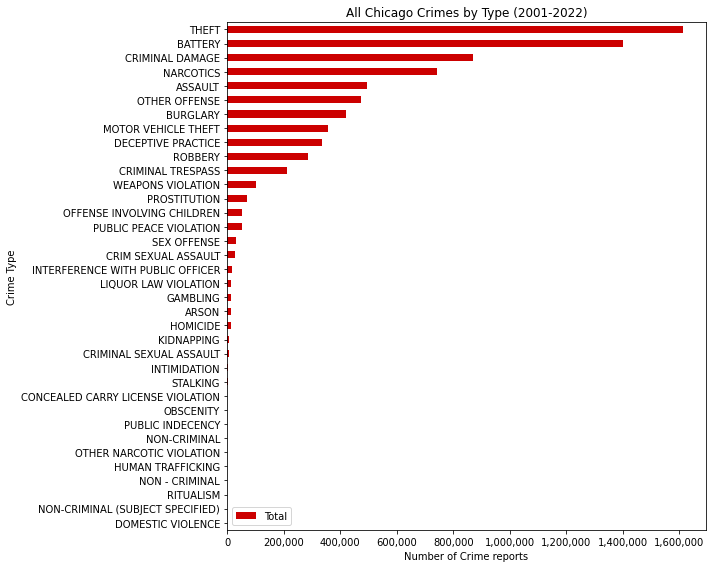

In [8]:
# plot crimes by primary type counts
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

all_crime_types = crime_type_counts.sort_values(by='Total', ascending=True)\
    .drop(['Arrest', 'Domestic'], axis=1)  # denotes column

all_crime_types.plot(kind='barh', figsize=(10, 8), color='#cc0000')
plt.title('All Chicago Crimes by Type (2001-2022)')
plt.xlabel('Number of Crime reports')
plt.ylabel('Crime Type')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

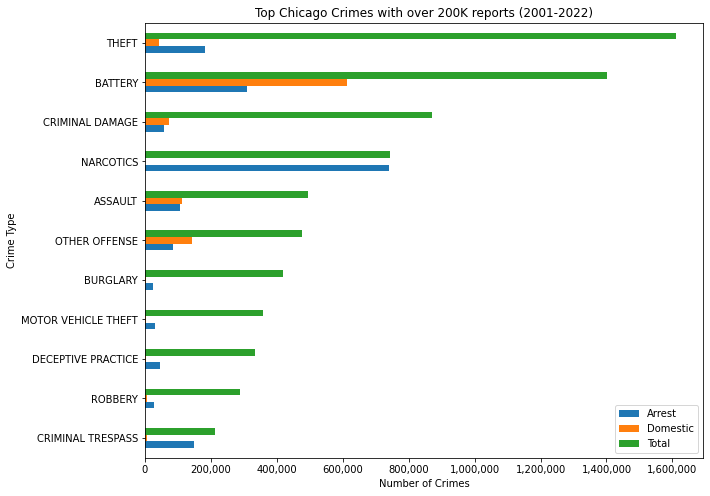

In [9]:
# plot top crimes with over 200,000 reports)
crime_type_counts[crime_type_counts['Total'] >= 200000].sort_values(by='Total', ascending=True)\
    .plot(kind='barh', figsize=(10, 8))
plt.title('Top Chicago Crimes with over 200K reports (2001-2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [10]:
# get narcotics crimes
narcotics = crimes[crimes['Primary Type'] == 'NARCOTICS']
#print(narcotics.head())

# get narcotics crime description counts
narcotics_crimes = narcotics[['Primary Type', 'Description']]\
    .groupby('Description').count()\
    .sort_values(by='Primary Type', ascending=False)

print(narcotics_crimes.head(10))
print('...')
print('Total Narcotics Crime Descriptions: {}'.format(len(narcotics_crimes)))

                                Primary Type
Description                                 
POSS: CANNABIS 30GMS OR LESS          278139
POSS: CRACK                           121112
POSS: HEROIN(WHITE)                    95786
SOLICIT NARCOTICS ON PUBLICWAY         27854
MANU/DELIVER: HEROIN (WHITE)           26446
POSS: COCAINE                          25470
MANU/DELIVER:CRACK                     24949
ATTEMPT POSSESSION NARCOTICS           21366
FOUND SUSPECT NARCOTICS                19502
POSS: CANNABIS MORE THAN 30GMS         19092
...
Total Narcotics Crime Descriptions: 80


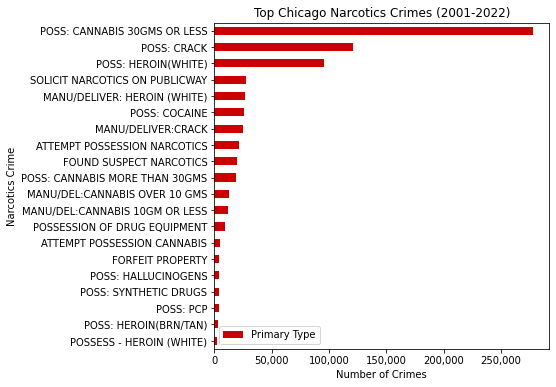

In [11]:
# plot top 20 narcotics crimes
narcotics_crimes[:20].sort_values(by='Primary Type', ascending=True)\
    .plot(kind='barh', figsize=(6, 6), color='#cc0000')
plt.title('Top Chicago Narcotics Crimes (2001-2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('Narcotics Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [12]:
# get other offenses crimes
other_offenses = crimes[crimes['Primary Type'] == 'OTHER OFFENSE']
#print(other_offenses.head())

# get other offense crime description counts
other_offense_crimes = other_offenses[['Primary Type', 'Description']]\
    .groupby('Description').count()\
    .sort_values(by='Primary Type', ascending=False)

print(other_offense_crimes.head(10))
print('...')
print('Total Other Offense Crime Descriptions: {}'.format(len(other_offense_crimes)))

                                Primary Type
Description                                 
TELEPHONE THREAT                      148121
HARASSMENT BY TELEPHONE               109798
OTHER VEHICLE OFFENSE                  40624
VIOLATE ORDER OF PROTECTION            39829
HARASSMENT BY ELECTRONIC MEANS         33313
FALSE/STOLEN/ALTERED TRP               21866
OTHER CRIME INVOLVING PROPERTY         12499
OTHER CRIME AGAINST PERSON              8657
VEHICLE TITLE/REG OFFENSE               8504
LICENSE VIOLATION                       8366
...
Total Other Offense Crime Descriptions: 63


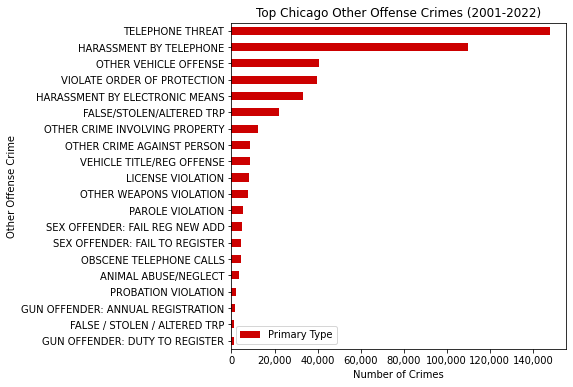

In [13]:
# plot top 20 other offense crimes
other_offense_crimes[:20].sort_values(by='Primary Type', ascending=True)\
    .plot(kind='barh', figsize=(6, 6), color='#cc0000')
plt.title('Top Chicago Other Offense Crimes (2001-2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('Other Offense Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [15]:
# read parquet data with date info
crimes = pd.read_parquet('../data/crimes.parquet')

In [26]:
# set Date index for time series
crimes.index = crimes['Date']
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-10 08:00:00,10351578,HY542217,2015-12-10 08:00:00,019XX S MILLER ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,25.0,31.0,11,1169771.0,1890901.0,2015,2018-02-10 15:50:01,41.856134,-87.652335,"(41.856133986, -87.652334517)"
2015-11-16 15:59:00,10351580,HY542156,2015-11-16 15:59:00,019XX W CERMAK RD,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,False,False,...,25.0,31.0,11,1163681.0,1889417.0,2015,2018-02-10 15:50:01,41.852192,-87.674730,"(41.852192114, -87.674729636)"
2015-12-18 13:00:00,10351582,HY542092,2015-12-18 13:00:00,034XX W 77TH ST,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,...,18.0,70.0,08B,1154616.0,1853337.0,2015,2018-02-10 15:50:01,41.753370,-87.708963,"(41.753369537, -87.708962817)"
2015-12-18 17:50:00,10351583,HY542284,2015-12-18 17:50:00,040XX W HARRISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),VEHICLE NON-COMMERCIAL,True,False,...,24.0,26.0,18,1149623.0,1897057.0,2015,2018-02-10 15:50:01,41.873441,-87.726128,"(41.873441474, -87.726128458)"
2015-12-18 16:55:00,10351584,HY542135,2015-12-18 16:55:00,071XX S BENNETT AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,5.0,43.0,08B,1189943.0,1857970.0,2015,2018-02-10 15:50:01,41.765306,-87.579355,"(41.765306435, -87.579354758)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18 00:51:00,12830673,JF400391,2022-09-18 00:51:00,068XX S MARSHFIELD AVE,0261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,ALLEY,False,False,...,17.0,67.0,02,NaN,NaN,2022,2022-10-07 16:46:51,NaN,NaN,None
2022-09-19 15:10:00,12832499,JF402441,2022-09-19 15:10:00,003XX W VAN BUREN ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,25.0,32.0,07,NaN,NaN,2022,2022-10-07 16:46:51,NaN,NaN,None
2022-09-21 17:00:00,12835537,JF406097,2022-09-21 17:00:00,097XX S PARNELL AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,21.0,73.0,07,NaN,NaN,2022,2022-10-07 16:46:51,NaN,NaN,None


In [27]:
crimes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7643707 entries, 2015-12-10 08:00:00 to 2022-09-17 07:00:00
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int32         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int32         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated O

In [31]:
# get arrests
arrests = crimes[crimes['Arrest'] == True]['Arrest']
arrests.head()


Date
2015-12-18 17:50:00    True
2015-12-18 18:36:00    True
2015-12-18 16:50:00    True
2015-12-18 17:03:00    True
2015-12-18 18:15:00    True
Name: Arrest, dtype: bool

In [32]:
# get domestic crimes
domestic = crimes[crimes['Domestic'] == True]['Domestic']
domestic.head()

Date
2015-12-18 16:55:00    True
2015-12-18 18:30:00    True
2015-12-18 16:50:00    True
2015-12-18 17:16:00    True
2015-11-25 00:01:00    True
Name: Domestic, dtype: bool

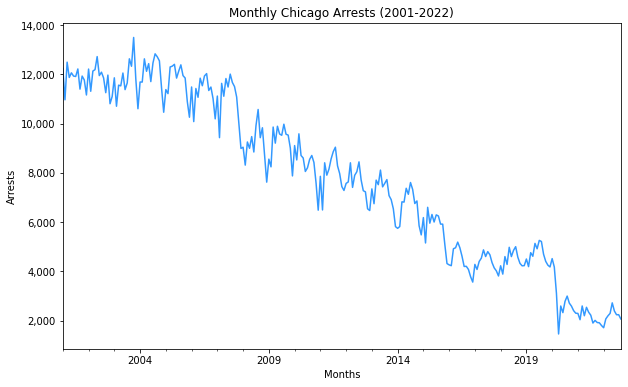

In [35]:
# plot monthly arrests
monthly_arrests = arrests.resample('M').sum()
monthly_arrests.plot(figsize=(10, 6), color='#3399ff')
plt.title('Monthly Chicago Arrests (2001-2022)')
plt.xlabel('Months')
plt.ylabel('Arrests')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [41]:
# get crime types
crime_types = crimes[['Primary Type']]

# get monthly total crime counts
monthly_crime = crime_types.resample('M').count()
monthly_crime

,Primary Type
Date,
2001-01-31,38114
2001-02-28,33783
2001-03-31,40562
2001-04-30,40088
2001-05-31,41835
...,...
2022-05-31,19925
2022-06-30,20444
2022-07-31,21912


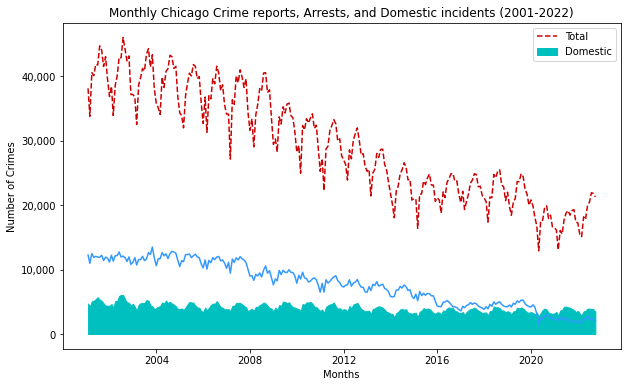

In [42]:
# get monthly domestic crimes
monthly_domestic = domestic.resample('M').sum()

# plot monthly crime counts, arrests, and domestic incidents reports
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_crime.index, monthly_crime,
        '--', label='Total', color='#cc0000')
ax.plot(monthly_arrests.index, monthly_arrests, color='#3399ff', zorder=10)
ax.fill_between(monthly_domestic.index, monthly_domestic,
                label='Domestic', color='c')
ax.set_xlabel('Months')
ax.set_ylabel('Number of Crimes')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(loc='upper right')
plt.title(
    'Monthly Chicago Crime reports, Arrests, and Domestic incidents (2001-2022)')
plt.show()

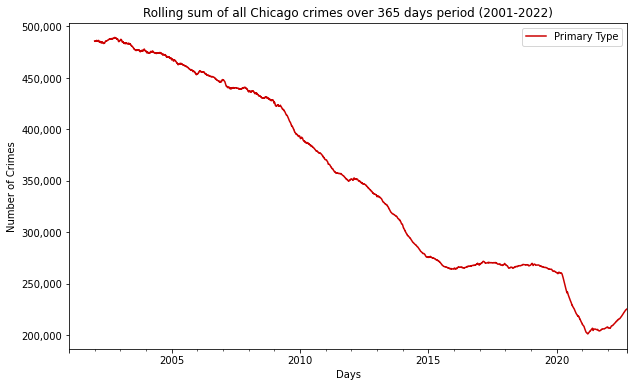

In [44]:
# get crimes rolling sum for a smoother crime decline chart display
crimes_rolling_sum = crime_types.resample(
    'D').count().rolling(365).sum()
crimes_rolling_sum.plot(figsize=(10, 6), color='#cc0000')
plt.title('Rolling sum of all Chicago crimes over 365 days period (2001-2022)')
plt.xlabel('Days')
plt.ylabel('Number of Crimes')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [45]:
# get top crime types
top_crime_types = crime_type_counts[crime_type_counts['Total'] >= 200000]\
    .sort_values(by='Total', ascending=False)
top_crime_types.head(10)

,Arrest,Domestic,Total
Primary Type,,,
THEFT,182305,43183,1612023
BATTERY,309617,611740,1401115
CRIMINAL DAMAGE,59079,73851,871255
NARCOTICS,739675,303,744105
ASSAULT,106672,113023,495960
OTHER OFFENSE,83782,142432,475452
BURGLARY,24009,3584,420155
MOTOR VEHICLE THEFT,30470,2130,357647
DECEPTIVE PRACTICE,46021,3815,334363


In [48]:
# get all crime data by month and primary type
crimes_groupby = crime_types.groupby([pd.Grouper(freq='M'), 'Primary Type'])
all_crime_data = crimes_groupby['Primary Type'].count().rename('Count')
print(all_crime_data.head(10))
print('...')

# unstack all crimes data for series plotting
all_crime_data = all_crime_data.unstack()
print(all_crime_data.head(2))

Date        Primary Type           
2001-01-31  ARSON                        67
            ASSAULT                    2123
            BATTERY                    6525
            BURGLARY                   1934
            CRIM SEXUAL ASSAULT         162
            CRIMINAL DAMAGE            3966
            CRIMINAL SEXUAL ASSAULT       4
            CRIMINAL TRESPASS          1192
            DECEPTIVE PRACTICE         1397
            DOMESTIC VIOLENCE             1
Name: Count, dtype: int64
...
Primary Type  ARSON  ASSAULT  BATTERY  BURGLARY  \
Date                                              
2001-01-31     67.0   2123.0   6525.0    1934.0   
2001-02-28     57.0   2029.0   6040.0    1666.0   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Date                                                                   
2001-01-31                                  NaN                162.0   
2001-02-28                                  NaN                134.0   



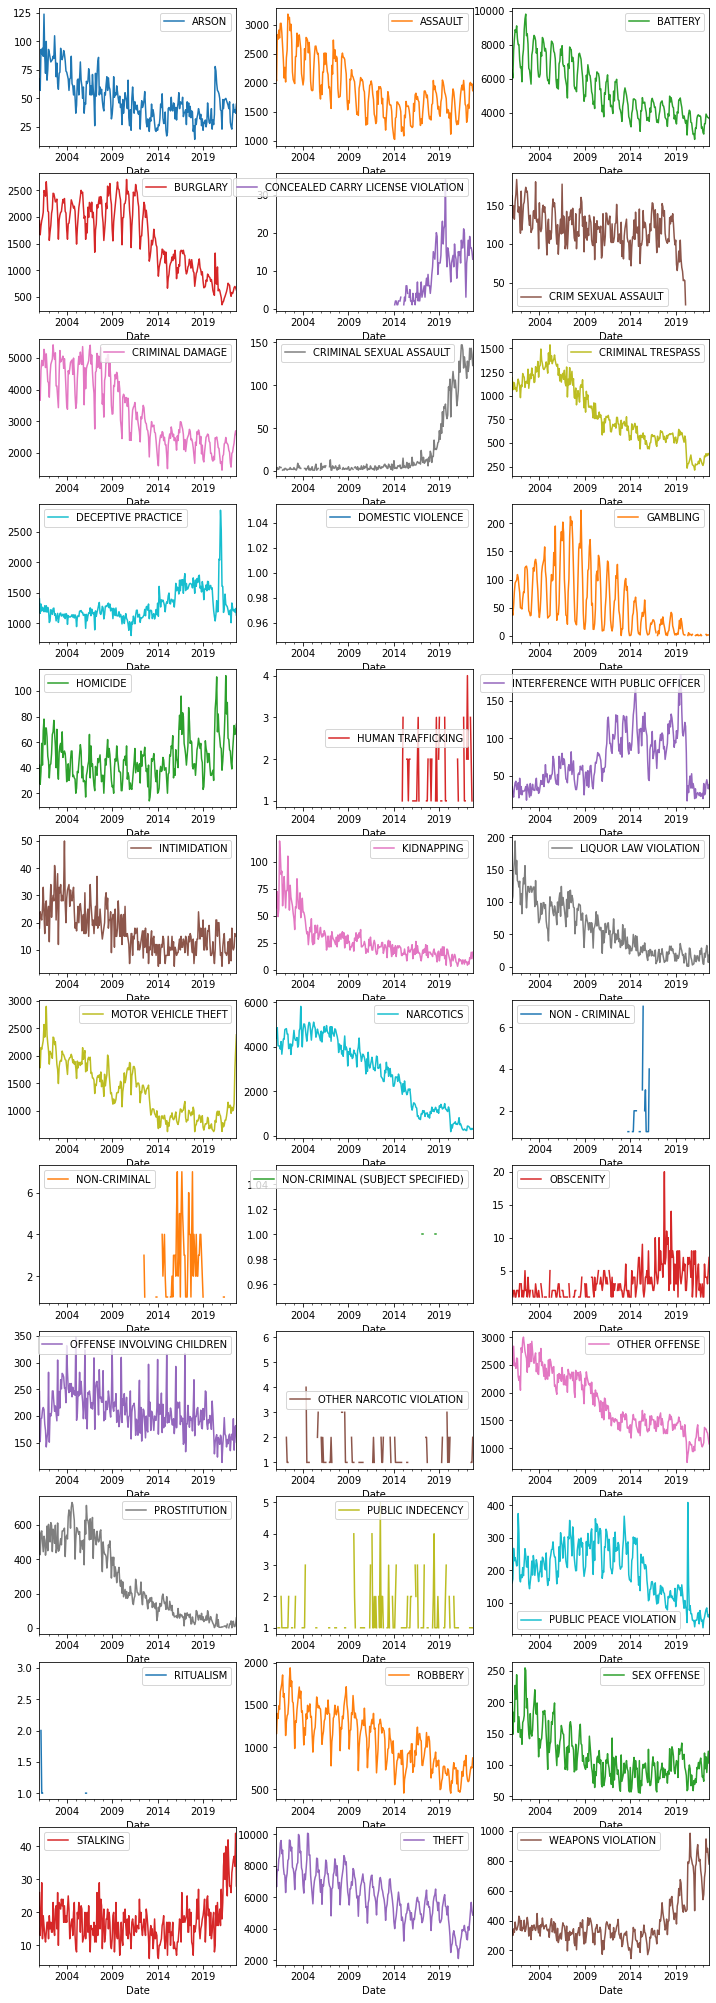

In [49]:
# plot all crimes over time individually
all_crime_data.plot(figsize=(12, 36), subplots=True, layout=(-1, 3),
                    sharex=False, sharey=False)
plt.show()